<a href="https://colab.research.google.com/github/arutraj/ML_Basics/blob/main/3_Neural_Network_from_scratch_using_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps to build a Neural Network from scratch in PyTorch

<ol>1. Loading the dataset (Input and Output)</ol>
<ol>2. Architecture of the model (# input, hidden and output neurons)</ol>
<ol>3. Initializing the weights for all the layers</ol>
<ol>4. Implementing forward propagation</ol>
<ol>5. Implementing backward propagation</ol>
<ol>6. Train the model for n epochs </ol>

## 1. Loading the dataset (Input and Output)

In [1]:
# importing required libraries
import torch
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# creating the input tensor
X = torch.tensor([[1,0,1,0], [1,0,1,1], [0,1,0,1]], dtype=torch.float)
print ('\nInput:')
print(X)
# shape of input tensor
print('\nShape of Input:', X.shape)


Input:
tensor([[1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [0., 1., 0., 1.]])

Shape of Input: torch.Size([3, 4])


In [3]:
# converting the input in matrix form
X = X.t()
print('\nInput in matrix form:')
print(X)
# shape of input matrix
print('\nShape of Input Matrix:', X.shape)


Input in matrix form:
tensor([[1., 1., 0.],
        [0., 0., 1.],
        [1., 1., 0.],
        [0., 1., 1.]])

Shape of Input Matrix: torch.Size([4, 3])


In [5]:
# creating the output tensor
y = torch.tensor([[1],[1],[0]], dtype=torch.float)
print ('\nActual Output:')
print(y)
print('\nShape of Output:', y.shape)
# output in matrix form
y = y.t()

print ('\nOutput in matrix form:')
print(y)

# shape of input array
print('\nShape of Output:', y.shape)


Actual Output:
tensor([[1.],
        [1.],
        [0.]])

Shape of Output: torch.Size([3, 1])

Output in matrix form:
tensor([[1., 1., 0.]])

Shape of Output: torch.Size([1, 3])


## 2. Architecture of the model (# input, hidden and output neurons)

In [6]:
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

![alt text](https://drive.google.com/uc?id=1zrEFVsc6bMQZ7fRxbK4DRceaG78k26Pc)

## 3. Initializing the weights for all the layers

NOTE: For simplicity, we are assuming that the bias for all the layers is 0

In [7]:
# initializing weights
# Shape of w_ih should number of neurons at input layer X number of neurons at hidden layer
w_ih=torch.randn(inputlayer_neurons,hiddenlayer_neurons)

# Shape of w_ho should number of neurons at hidden layer X number of neurons at output layer
w_ho=torch.randn(hiddenlayer_neurons,output_neurons)

In [8]:
# shape of weight matrix
w_ih.shape, w_ho.shape

(torch.Size([4, 3]), torch.Size([3, 1]))

## 4. Implementing forward propagation

![alt text](https://drive.google.com/uc?id=1YwD7vY9k84vZmjmE5CXgQ69fYyadPsox)

In [9]:
# We are using sigmoid as an activation function so defining the sigmoid function here

# defining the Sigmoid Function
def sigmoid(s):
    return 1 / (1 + torch.exp(-s))

In [10]:
# hidden layer activations
hidden_layer_input=torch.matmul(w_ih.t(),X)
hiddenlayer_activations = sigmoid(hidden_layer_input)

![alt text](https://drive.google.com/uc?id=1ETMoLD1fwi5u1HHLqtAdVUs-P8HNOU_p)

In [11]:
# calculating the output
output_layer_input=torch.matmul(w_ho.t(),hiddenlayer_activations)
output = sigmoid(output_layer_input)

In [12]:
# output
output

tensor([[0.5853, 0.6156, 0.8893]])

## 5. Implementing backward propagation

![alt text](https://drive.google.com/uc?id=1uYdg4mQL-B9o7BTOLnfoYUhh_LxTnpcW)

In [13]:
# calculating error
error = torch.pow(y-output,2) /2

## 1. Rate of change of error w.r.t. who
## 2. Rate of change of error w.r.t. wih

### Rate of change of error w.r.t weight between hidden and output layer

![alt text](https://drive.google.com/uc?id=1_KexjgVJGRptZ6t1eobTter3mfIGo9rs)

**a. Rate of change of error w.r.t output**

**b. Rate of change of output w.r.t Z2**

**c. Rate of change of Z2 w.r.t weights between hidden and output layer**

![alt text](https://drive.google.com/uc?id=1VesmZOVpfgLFESvOFd7dE-YHNtSMMkvM)

In [14]:
# rate of change of error w.r.t. output
error_wrt_output = -(y-output)

# rate of change of output w.r.t. Z2
output_wrt_Z2 =  torch.mul(output,(1-output))

# rate of change of Z2 w.r.t. weights between hidden and output layer
Z2_wrt_who = hiddenlayer_activations

In [15]:
# rate of change of error w.r.t weight between hidden and output layer
error_wrt_who =  torch.matmul(Z2_wrt_who,(error_wrt_output*output_wrt_Z2).t())

### Rate of change of error w.r.t weight between input and hidden layer

![alt text](https://drive.google.com/uc?id=1X4-iInwlv7ber3fwgtqHuHTuFRci-tMV)

**a. Rate of change of error w.r.t output**

**b. Rate of change of output w.r.t Z2**

**c. Rate of change of Z2 w.r.t hidden layer activations**

**d. Rate of change of hidden layer activations w.r.t Z1**

**e. Rate of change of Z1 w.r.t weights between input and hidden layer**

![alt text](https://drive.google.com/uc?id=1RkG5x1NEFWlF3tj0OlswOWvBcV5XNV1C)

In [16]:
# rate of change of error w.r.t. output
error_wrt_output = -(y-output)

# rate of change of output w.r.t. Z2
output_wrt_Z2 = torch.mul(output,(1-output))

# rate of change of Z2 w.r.t. hidden layer activations
Z2_wrt_h1 = w_ho

# rate of change of hidden layer activations w.r.t. Z1
h1_wrt_Z1 = torch.mul(hiddenlayer_activations,(1-hiddenlayer_activations))

# rate of change of Z1 w.r.t. weights between input and hidden layer
Z1_wrt_wih = X

In [17]:
# rate of change of error w.r.t weights between input and hidden layer
error_wrt_wih =  torch.matmul(Z1_wrt_wih,(h1_wrt_Z1*torch.matmul(Z2_wrt_h1,(output_wrt_Z2*error_wrt_output))).t())

### Update the parameters

![alt text](https://drive.google.com/uc?id=1A5jaB3WjZx9yrJkk9imVEvP3PZodjapE)

In [18]:
# defining the learning rate
lr = 0.01

In [19]:
# initial w_ho and w_ih
w_ho

tensor([[ 2.3638],
        [-0.1028],
        [ 0.2026]])

In [20]:
w_ih

tensor([[-1.8708, -2.0651,  0.1725],
        [ 1.2944, -2.4143, -0.9971],
        [-0.4206,  0.7465,  0.8596],
        [ 0.4282, -0.2193,  0.6790]])

In [21]:
# updating the weights of output layer
w_ho = w_ho - lr * error_wrt_who

In [22]:
# updating the weights of hidden layer
w_ih = w_ih - lr * error_wrt_wih

In [23]:
# updated w_ho and w_ih
w_ho

tensor([[ 2.3632],
        [-0.1024],
        [ 0.2037]])

In [24]:
w_ih

tensor([[-1.8704, -2.0651,  0.1725],
        [ 1.2941, -2.4143, -0.9971],
        [-0.4201,  0.7465,  0.8596],
        [ 0.4282, -0.2193,  0.6790]])

## 6. Training the model for n epochs

In [25]:
# defining the model architecture
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

# initializing weight
w_ih=torch.randn(inputlayer_neurons,hiddenlayer_neurons, dtype=torch.float)
w_ho=torch.randn(hiddenlayer_neurons,output_neurons, dtype=torch.float)

# defining the parameters
lr = 0.01
epochs = 10000

In [26]:
# initial w_ih and w_ho
w_ih

tensor([[-1.3987, -0.1762, -2.9546],
        [-1.6371, -0.7289,  1.2101],
        [ 1.4449,  0.9256, -0.0443],
        [-1.5374, -1.5111,  1.5929]])

In [27]:
w_ho

tensor([[ 2.0410],
        [-0.0299],
        [-0.2765]])

In [28]:
error_epoch = []
for i in range(epochs):
    # Forward Propogation

    # hidden layer activations
    hidden_layer_input= torch.matmul(w_ih.t(),X)
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    # calculating the output
    output_layer_input= torch.matmul(w_ho.t(),hiddenlayer_activations)
    output = sigmoid(output_layer_input)


    # Backward Propagation

    # calculating error
    error = (y-output)*(y-output)/2
    error_wrt_output = -(y-output)
    output_wrt_Z2 = torch.mul(output,(1-output))
    Z2_wrt_who = hiddenlayer_activations
    # rate of change of error w.r.t weight between hidden and output layer
    error_wrt_who =  torch.matmul(Z2_wrt_who,(error_wrt_output*output_wrt_Z2).t())
    Z2_wrt_h1 = w_ho
    h1_wrt_Z1 = torch.mul(hiddenlayer_activations,(1-hiddenlayer_activations))
    Z1_wrt_wih = X
    # rate of change of error w.r.t weights between input and hidden layer
    error_wrt_wih =  torch.matmul(Z1_wrt_wih,(h1_wrt_Z1*torch.matmul(Z2_wrt_h1,(error_wrt_output*output_wrt_Z2))).t())

    # updating the weights between hidden and output layer
    w_ho = w_ho - lr * error_wrt_who
    # updating the weights between input and hidden layer
    w_ih = w_ih - lr * error_wrt_wih

    # appending the error of each epoch
    error_epoch.append(torch.mean(error))

In [29]:
# updated w_ih and w_ho
w_ih

tensor([[-0.1992,  0.0174, -3.2602],
        [-1.9898, -0.8310,  1.4184],
        [ 2.6445,  1.1192, -0.3498],
        [-0.9192, -1.4540,  1.5161]])

In [30]:
w_ho

tensor([[ 3.2233],
        [ 0.7257],
        [-2.6377]])

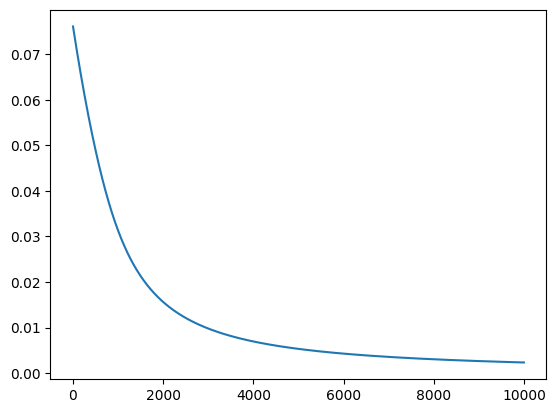

In [31]:
# visualizing the error after each epoch
plt.plot(torch.arange(1,epochs+1).numpy(), torch.Tensor(error_epoch).numpy())

In [32]:
# final output from the model
output

tensor([[0.9691, 0.9349, 0.0936]])

In [33]:
# actual target
y

tensor([[1., 1., 0.]])

In [34]:
# error at last epoch
error

tensor([[0.0005, 0.0021, 0.0044]])